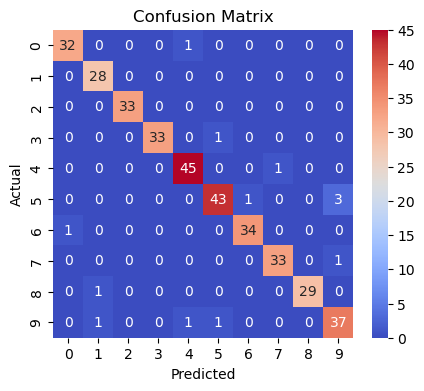

In [6]:
# Aim: Implement a Machine Learning model using
#      Random Forest
# Name: Binish Moosa
# UIN: 232P001, Roll No.: 24

import tkinter as tk
from tkinter import messagebox
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def train_model():
    try:
        # Load dataset
        digits = load_digits()
        X_train, X_test, y_train, y_test = train_test_split(
            digits.data, digits.target, test_size=0.2, random_state=42
        )

        # Train Random Forest
        model = RandomForestClassifier(
            n_estimators=int(n_estimators_entry.get()), random_state=42
        )
        model.fit(X_train, y_train)

        # Accuracy
        accuracy = model.score(X_test, y_test)
        accuracy_lbl.config(text=f"Accuracy: {accuracy:.2f}")

        # Confusion matrix
        cm = confusion_matrix(y_test, model.predict(X_test))
        fig, ax = plt.subplots(figsize=(6, 4))
        sn.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", ax=ax)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
        ax.set_title("Confusion Matrix")

        # Clear previous canvas
        for widget in canvas_frame.winfo_children():
            widget.destroy()

        # Embed plot in Tkinter
        canvas = FigureCanvasTkAgg(fig, master=canvas_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()

    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
app = tk.Tk()
app.title("Random Forest Classifier - Binish Moosa 232P001")

# Light pink theme
bg_color = "#ffe6f2"  # very soft light pink
btn_color = "#ff99cc"  # medium pink
btn_hover = "#ff66b2"  # darker pink
text_color = "#4a004a"  # dark purple for contrast

app.config(bg=bg_color)

# Input field
tk.Label(app, text="Number of Estimators:", bg=bg_color, fg=text_color, font=("Arial", 11, "bold")).pack(pady=10)
n_estimators_entry = tk.Entry(app, bg="white", fg=text_color, relief="solid", justify="center")
n_estimators_entry.insert(0, "20")
n_estimators_entry.pack(pady=5)

# Hover effect for button
def on_enter(e):
    train_btn.config(bg=btn_hover)

def on_leave(e):
    train_btn.config(bg=btn_color)

# Train button
train_btn = tk.Button(app, text="Train Model", command=train_model, bg=btn_color, fg="white", font=("Arial", 11, "bold"), relief="flat", padx=10, pady=5)
train_btn.bind("<Enter>", on_enter)
train_btn.bind("<Leave>", on_leave)
train_btn.pack(pady=15)

# Accuracy label
accuracy_lbl = tk.Label(app, text="Accuracy: N/A", bg=bg_color, fg=text_color, font=("Arial", 11))
accuracy_lbl.pack(pady=10)

# Canvas frame for confusion matrix
canvas_frame = tk.Frame(app, bg=bg_color)
canvas_frame.pack(pady=15)

# Run GUI
app.mainloop()
